# DEEE725 Speech Signal Processing Lab
### 2023 Spring, Kyungpook National University 
### Instructor: Gil-Jin Jang

## Lab 02 Draw spectrogram
2023/03/24
source: 

> https://hyunlee103.tistory.com/36

> https://dacon.io/en/competitions/official/235616/codeshare/1277

> https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
# import necessary pacakages
import sys
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

In [4]:
# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma 
#cmap_plot = plt.cm.inferno
Fs = 16000

#wavfile = 'kdigits0-2.wav'  # 0.6 - 1.1
wavfile = '/Users/user/Library/CloudStorage/OneDrive-knu.ac.kr/20231/대학원_장길진_음성신호처리실습/ssp2023/lab01/segmented/3/kdigits3-3.wav'  # 1.0 - 1.5

### load an example windows wav file

In [5]:
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)
print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
print('Fs = %d, Ns = %d, Nf = %d' % (Fs, Ns, Nf))

[-0.00234985 -0.00308228 -0.00341797 ... -0.01873779 -0.02047729
 -0.02197266] (13927,)
Fs = 16000, Ns = 160, Nf = 320


### Waveform 시각화

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

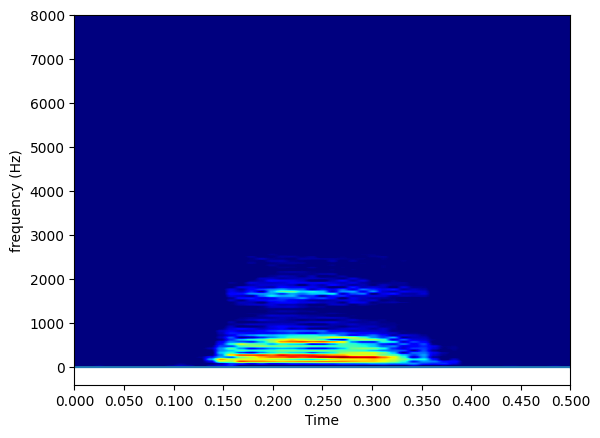

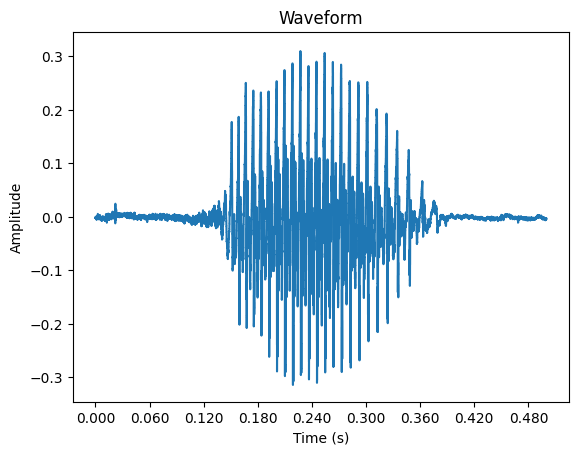

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [72]:
#plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform.png')

- 음성 부분만 tight하게 잘라낸다

In [8]:
x, Fs = librosa.load(wavfile, sr = Fs)
x = x[int(Fs*1.0):int(Fs*1.5)]

#plt.figure(figsize=FIG_SIZE)
plt.clf()
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform_voice.png')

### draw spectrogram

In [10]:
plt.clf()
# draw spectrum by matplotlib
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(Ns*2),
        NFFT=Ns*2,noverlap=80,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.savefig('03.png')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

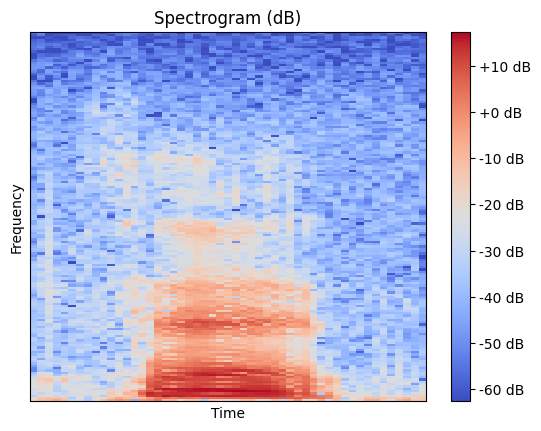

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [12]:
# draw spectrum by librosa
# https://dacon.io/en/competitions/official/235616/codeshare/1277

plt.clf()


# STFT -> spectrogram
stft = librosa.stft(x, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.savefig('04.png')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

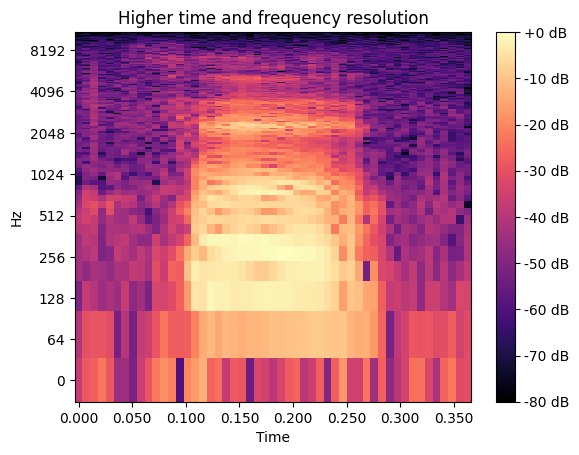

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
plt.figure()
# draw spectrum by librosa, log scale in frequency
# https://librosa.org/doc/main/auto_examples/plot_display.html
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=Nf)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [15]:
plt.clf()
# draw spectrum using scipy - not working
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
print(x.shape)
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig('06.png')

(8000,)


## 직접 그려본다

1. 20 ms 간격으로 나눈다

2. FFT 수행 

3. `imshow`로 그린다.

- 한 frame 그려보기 

In [16]:
# 0.2~0.22 부분을 추출한다. 
y = x[int(Fs*0.2):int(Fs*0.22)]

In [18]:
Y = np.abs(np.fft.fft(y))
plt.clf()
plt.plot(Y)
plt.savefig('11.png')

In [19]:
# 0~PI+1 까지의 절대값
plt.clf()
Y = np.abs(np.fft.fft(y))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)
plt.savefig('12.png')

In [20]:
# 0~PI+1 까지의 절대값
# log scale 로
plt.clf()
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)
plt.savefig('13.png')

In [21]:
# 0~PI+1 까지의 절대값
# log scale 로
plt.clf()
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.savefig('14.png')

### Short-time Fourier transform

In [22]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

In [23]:
plt.clf()
plt.imshow(X, cmap=cmap_plot)
plt.savefig('./21.png')

In [24]:
plt.clf()
plt.imshow(X, cmap=cmap_plot, origin='lower')
plt.savefig('./22.png')

In [25]:
plt.clf()
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.savefig('./23.png')

In [28]:
plt.clf()
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.savefig('./24.png')

13.126833884018861 0.7050746354016717


### Hamming windows

In [29]:
plt.clf()
T = 1024
sinusoid = np.sin(np.arange(T)/T*20*np.pi)
plt.plot(sinusoid)
plt.savefig('31.png')

In [30]:
plt.clf()
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.savefig('32.png')

In [31]:
plt.clf()
win = librosa.filters.get_window('hamming', T, fftbins=True)
plt.plot(win)
plt.savefig('33.png')

In [32]:
plt.clf()
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(win*sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')
plt.savefig('34.png')

### STFT에 hamming window 적용 

- 20 ms frame size, 10 ms shift size 적용, rectangular window

In [33]:
plt.clf()
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.savefig('41.png')

13.767264121802409 0.6898897531907507


- 20 ms frame size, 10 ms shift size 적용, hamming window

In [34]:
plt.clf()
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
plt.plot(win)
plt.savefig('42.png')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

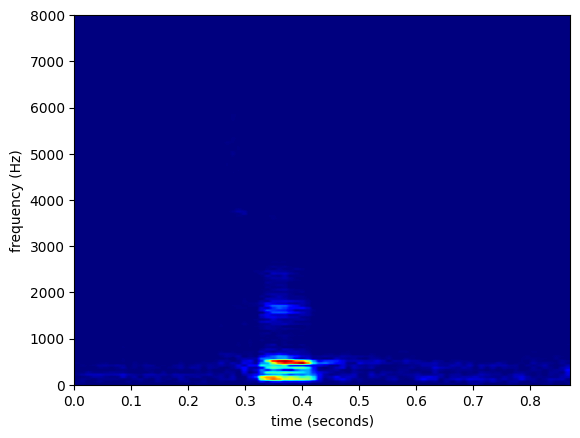

AttributeError: module 'matplotlib' has no attribute 'pyplot'

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

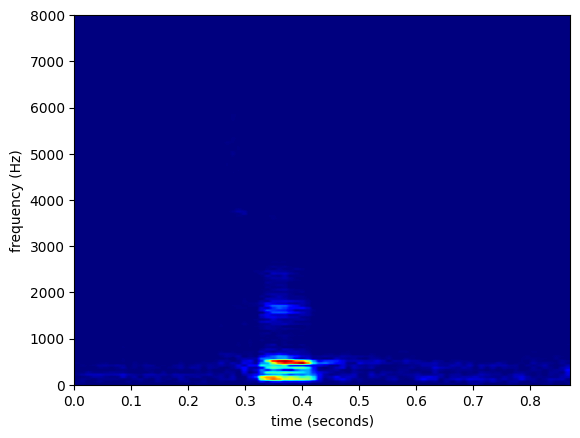

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
plt.clf()
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    # hamming window
    y = win*y
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]

# 상위 80%-90% 정도만 scale 한다. 출력 보면서 결정
# FILL with your code

max = np.max(X[:])
min = np.percentile(X[:], 90)

plt.figure()
plt.imshow(X, cmap='jet', origin='lower', aspect='auto', extent=specgram_axis, vmax=max, vmin=min)

plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.savefig('spectrum.png')
plt.show()

## Resampling: Decimation, Upsampling, lowpass filter design

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

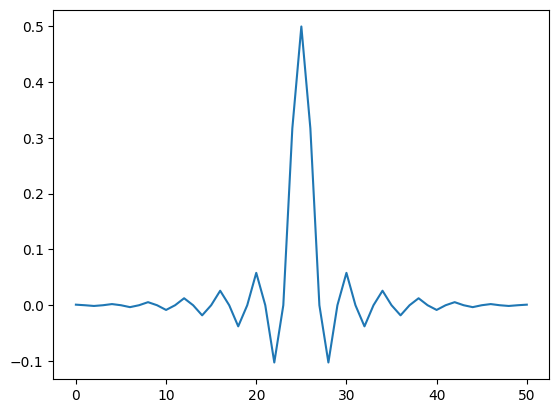

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [51]:
plt.clf()
# scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)[source]
# FIR filter design using the window method.

a = signal.firwin(51, 0.5, window='hamming')
plt.plot(a)
plt.show()

## End of Lab 02